In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report

In [ ]:
social_n_data = pd.read_csv("Social_Network_Ads.csv")
pd.concat([social_n_data.head(),social_n_data.tail()])

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
395,15691863,Female,46,41000,1
396,15706071,Male,51,23000,1
397,15654296,Female,50,20000,1
398,15755018,Male,36,33000,0
399,15594041,Female,49,36000,1


In [ ]:
social_n_data.isnull().any()

User ID            False
Gender             False
Age                False
EstimatedSalary    False
Purchased          False
dtype: bool

<Axes: xlabel='Purchased', ylabel='count'>

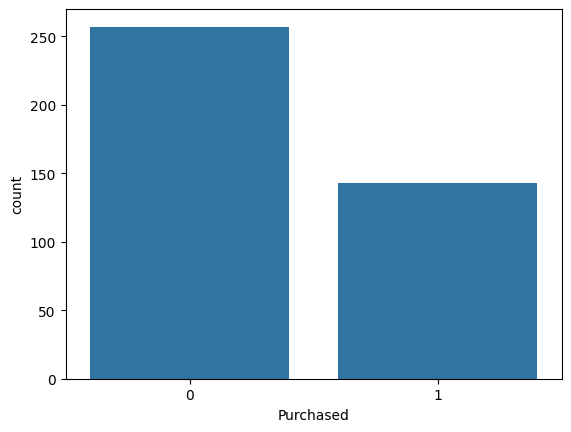

In [ ]:
sns.countplot(x="Purchased", data = social_n_data)

<Axes: xlabel='Purchased', ylabel='count'>

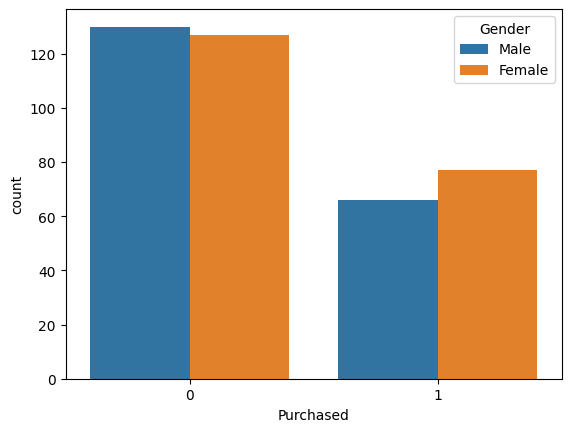

In [ ]:
sns.countplot(x="Purchased", hue="Gender", data = social_n_data)


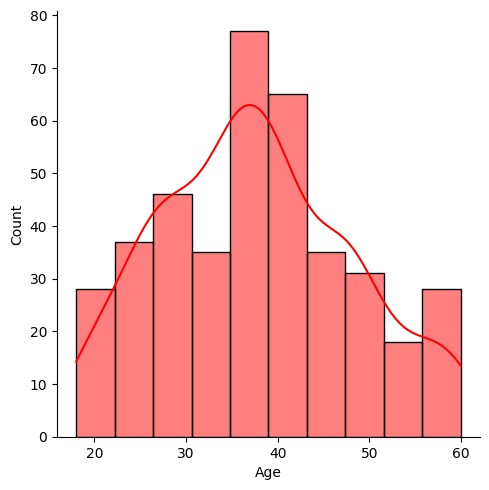

In [ ]:
sns.displot(x="Age", data = social_n_data, color = "red", kde=True)

In [ ]:
social_n_data.drop('User ID', axis = 1, inplace = True)

In [ ]:
social_n_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Gender           400 non-null    object
 1   Age              400 non-null    int64 
 2   EstimatedSalary  400 non-null    int64 
 3   Purchased        400 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 12.6+ KB


In [ ]:
gender = pd.get_dummies(social_n_data['Gender'], drop_first = True)
social_n_data.drop('Gender', axis=1, inplace = True)
social_n_data = pd.concat([social_n_data,gender],axis=1)

In [ ]:
social_n_data.head()

,Age,EstimatedSalary,Purchased,Male
0,19,19000,0,True
1,35,20000,0,True
2,26,43000,0,False
3,27,57000,0,False
4,19,76000,0,True


In [ ]:
X = social_n_data.iloc[:,[0,1,3]]
X.head()

,Age,EstimatedSalary,Male
0,19,19000,True
1,35,20000,True
2,26,43000,False
3,27,57000,False
4,19,76000,True


In [ ]:
Y = social_n_data.iloc[:,2]
Y.head()

0    0
1    0
2    0
3    0
4    0
Name: Purchased, dtype: int64

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X = sc.fit_transform(X)
X

array([[-1.78179743, -1.49004624,  1.02020406],
       [-0.25358736, -1.46068138,  1.02020406],
       [-1.11320552, -0.78528968, -0.98019606],
       ...,
       [ 1.17910958, -1.46068138, -0.98019606],
       [-0.15807423, -1.07893824,  1.02020406],
       [ 1.08359645, -0.99084367, -0.98019606]])

In [ ]:
from sklearn.model_selection import train_test_split
Xtrain,Xtest,Ytrain,Ytest = train_test_split(X,Y,test_size = 0.3,random_state = 1)

print("Xtrain : ", Xtrain.shape)
print("Xtest : ", Xtest.shape)
print("Ytrain : ", Ytrain.shape)
print("Ytest : ", Ytest.shape)

Xtrain :  (280, 3)
Xtest :  (120, 3)
Ytrain :  (280,)
Ytest :  (120,)


In [ ]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()
classifier.fit(Xtrain,Ytrain)

LogisticRegression()

In [ ]:
yPredict = classifier.predict(Xtest)

In [ ]:
result = pd.DataFrame({'Actual': Ytest, 'Predicted' : yPredict})
result.head()

,Actual,Predicted
398,0,0
125,0,0
328,1,1
339,1,1
172,0,0


In [ ]:
classifier.coef_


array([[2.36839196, 1.42929561, 0.20973787]])

In [ ]:
classifier.intercept_

array([-1.1352347])

In [ ]:
cf_matrix = confusion_matrix(Ytest,yPredict)
cf_matrix

array([[63,  9],
       [14, 34]])

Text(0.5, 23.52222222222222, 'Predicted')

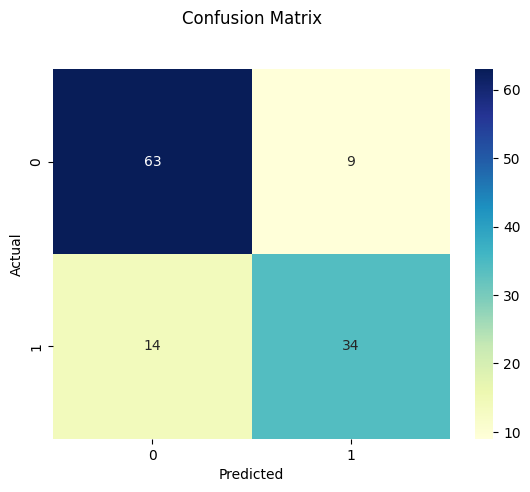

In [ ]:
sns.heatmap(pd.DataFrame(cf_matrix), annot=True, cmap = "YlGnBu",fmt='g')
plt.title("Confusion Matrix", y=1.1)
plt.ylabel("Actual")
plt.xlabel("Predicted")

In [ ]:
from sklearn.metrics import accuracy_score

accuracy_score(Ytest,yPredict)

0.8083333333333333

In [ ]:
errorRate = 1 - accuracy_score(Ytest,yPredict)
errorRate

0.19166666666666665

In [ ]:
from sklearn.metrics import recall_score
recall = recall_score(Ytest,yPredict)
recall

0.7083333333333334

In [ ]:
from sklearn.metrics import precision_score

precision = precision_score(Ytest,yPredict)
precision

0.7906976744186046